In [1]:
import pandas as pd


In [2]:
# Load the dataset
file_path = r"C:\Users\varun\Downloads\Company_Data (3).csv"
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [4]:
# Check for basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


In [5]:
# Summary statistics
print(df.describe())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

In [6]:
print(df.isnull().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [7]:
# Check unique values for categorical columns
print(df['ShelveLoc'].value_counts())
print(df['Urban'].value_counts())
print(df['US'].value_counts())

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64
Urban
Yes    282
No     118
Name: count, dtype: int64
US
Yes    258
No     142
Name: count, dtype: int64


# Exploratory Data Analysis
Sales Distribution

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


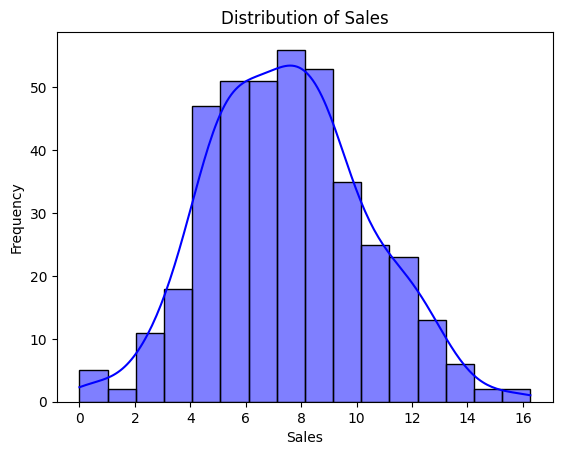

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Sales'], kde=True, color='blue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


# Correlations

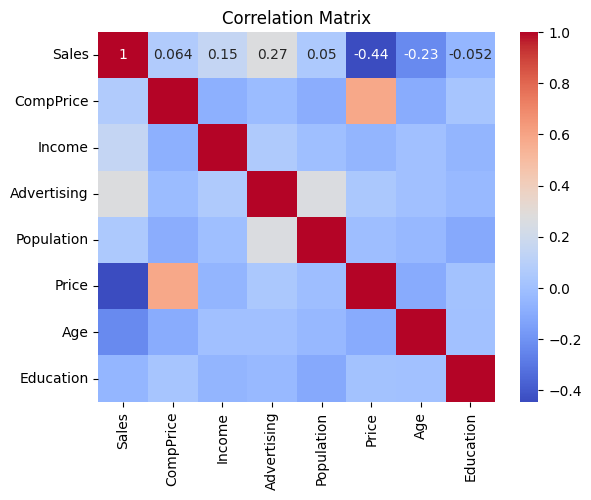

In [10]:
# Correlation heatmap
numeric_columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
corr_matrix = df[numeric_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Categorical Variable Analysis

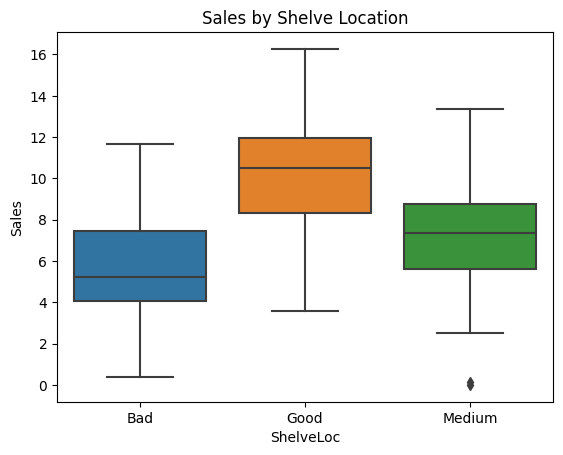

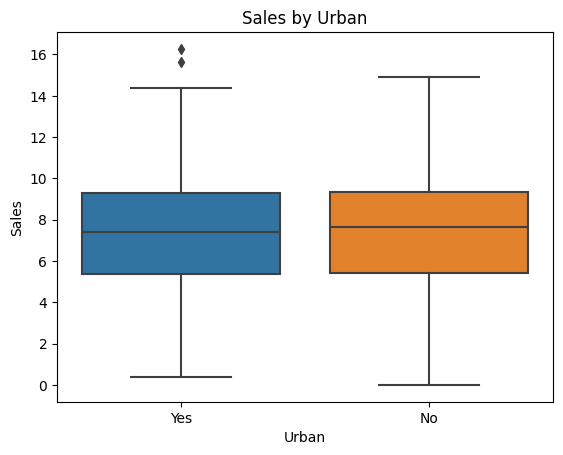

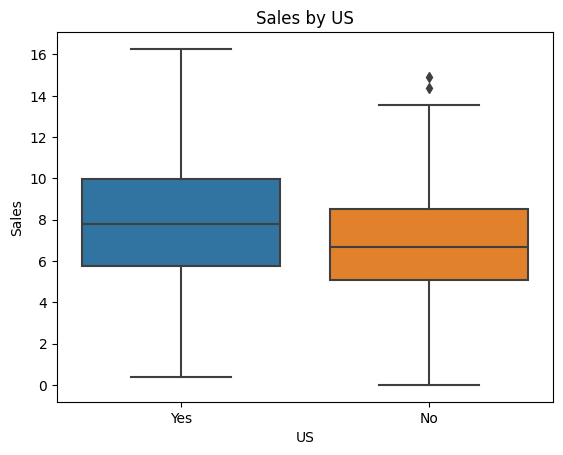

In [11]:
# Sales by ShelveLoc
sns.boxplot(x='ShelveLoc', y='Sales', data=df)
plt.title("Sales by Shelve Location")
plt.show()

# Sales by Urban/US
sns.boxplot(x='Urban', y='Sales', data=df)
plt.title("Sales by Urban")
plt.show()

sns.boxplot(x='US', y='Sales', data=df)
plt.title("Sales by US")
plt.show()


# Preprocessing
Handle Categorical Variables: Convert ShelveLoc, Urban, and US into numeric representations:

In [12]:
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)


# Outlier Detection
We will use boxplots to visually inspect outliers and z-scores to detect them numerically.

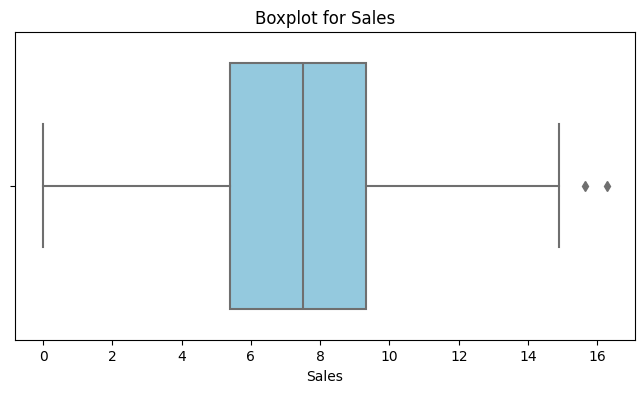

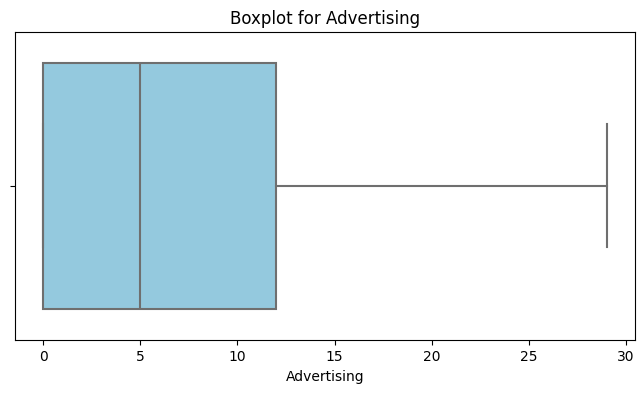

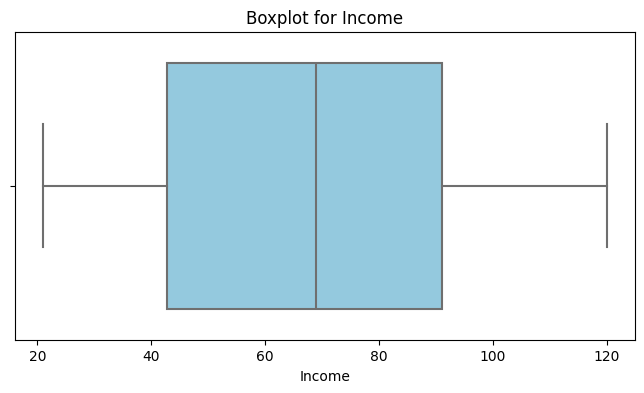

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for 'Sales', 'Advertising', and 'Income'
numeric_columns = ['Sales', 'Advertising', 'Income']
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot for {column}')
    plt.show()


# Numerical Outlier Detection (Z-Score Method)
A z-score measures how far a data point is from the mean in terms of standard deviations. We typically consider points with a z-score > 3 or < -3 as outliers.

python
Copy code


In [15]:
from scipy.stats import zscore

# Calculate z-scores for selected numeric columns
z_scores = df[numeric_columns].apply(zscore)

# Identify outliers (z-scores > 3 or < -3)
outliers = (z_scores.abs() > 3).any(axis=1)

# Print number of outliers detected
print(f"Number of outliers detected: {outliers.sum()}")


Number of outliers detected: 2


Option 1: Remove the Outliers
If the outliers are extreme values that might distort the model, simply drop them:

In [17]:
# Remove outliers
df_cleaned = df[~outliers]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")


Original dataset shape: (400, 12)
Dataset shape after removing outliers: (398, 12)


Option 2: Cap the Outliers
If the outliers are valid but extreme, capping them at the 5th and 95th percentiles ensures they don't dominate the model:

In [18]:
# Cap outliers at 5th and 95th percentiles
for column in numeric_columns:
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

print("Outliers have been capped.")


Outliers have been capped.


Option 3: Keep the Outliers
If the outliers have business significance (e.g., large sales spikes), keep them but use robust models like Decision Trees or Random Forest, which are less sensitive to outliers.

# Visualization After Outlier Handling
Replot the boxplots to confirm that outliers have been addressed:

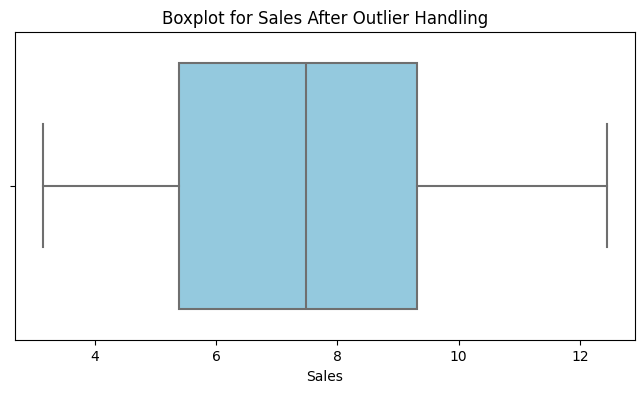

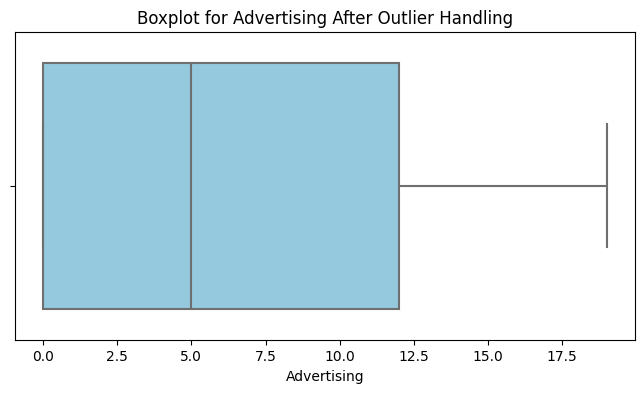

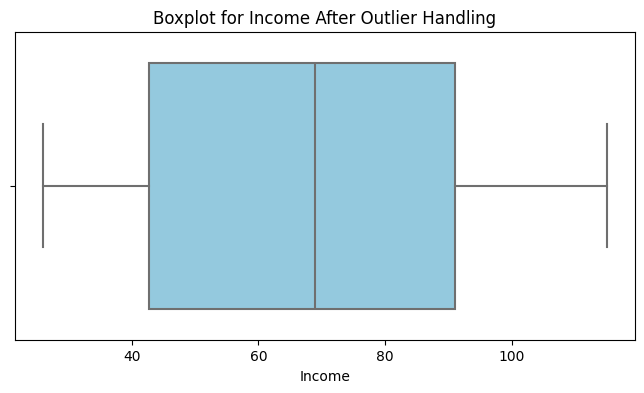

In [19]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot for {column} After Outlier Handling')
    plt.show()


# Split Data and Model Building
Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Sales"])  # Features
y = df["Sales"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = model_dt.predict(X_test)

# Metrics
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree MSE: 4.106929237499999
Decision Tree R2 Score: 0.41311206961490676


# Next Steps to Improve Model Performance
Hyperparameter Tuning: Optimize the Decision Tree by adjusting parameters like

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best R2 Score: 0.4185865248492515


# Feature Engineering:

Investigate whether any feature transformations (e.g., log transformations for skewed features like Income or Advertising) improve model performance.
Assess feature importance using the Decision Tree model and drop less important features.

In [27]:
# Feature importance
feature_importances = model_dt.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


             Feature  Importance
4              Price    0.294711
7     ShelveLoc_Good    0.198193
5                Age    0.128572
0          CompPrice    0.111647
1             Income    0.081981
8   ShelveLoc_Medium    0.071470
2        Advertising    0.056845
3         Population    0.028685
6          Education    0.024965
9          Urban_Yes    0.001982
10            US_Yes    0.000948


Try Ensemble Methods: Decision Trees can benefit greatly from ensemble techniques such as:

Random Forest (Bagging): Aggregates predictions from multiple trees to reduce variance.
Boosting (e.g., Gradient Boosting, XGBoost): Focuses on correcting errors made by previous trees.
Example for Random Forest:




In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest MSE: 1.9703485120768736
Random Forest R2 Score: 0.7184334831407856


In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_dt, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}")


Cross-Validated R2 Scores: [0.47510421 0.22916588 0.54234754 0.16742529 0.27690039]
Mean CV R2 Score: 0.3381886610422452


# Retrain the Model Using Best Parameters
Now, retrain the model with the optimized parameters and evaluate its performance on the test set:

In [30]:
# Retrain the Decision Tree with optimized parameters
optimized_model_dt = DecisionTreeRegressor(
    max_depth=5, 
    min_samples_leaf=4, 
    min_samples_split=2, 
    random_state=42
)
optimized_model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = optimized_model_dt.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import mean_squared_error, r2_score
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Optimized Decision Tree MSE:", mse_optimized)
print("Optimized Decision Tree R2 Score:", r2_optimized)


Optimized Decision Tree MSE: 3.8799974445710483
Optimized Decision Tree R2 Score: 0.44554105063424443


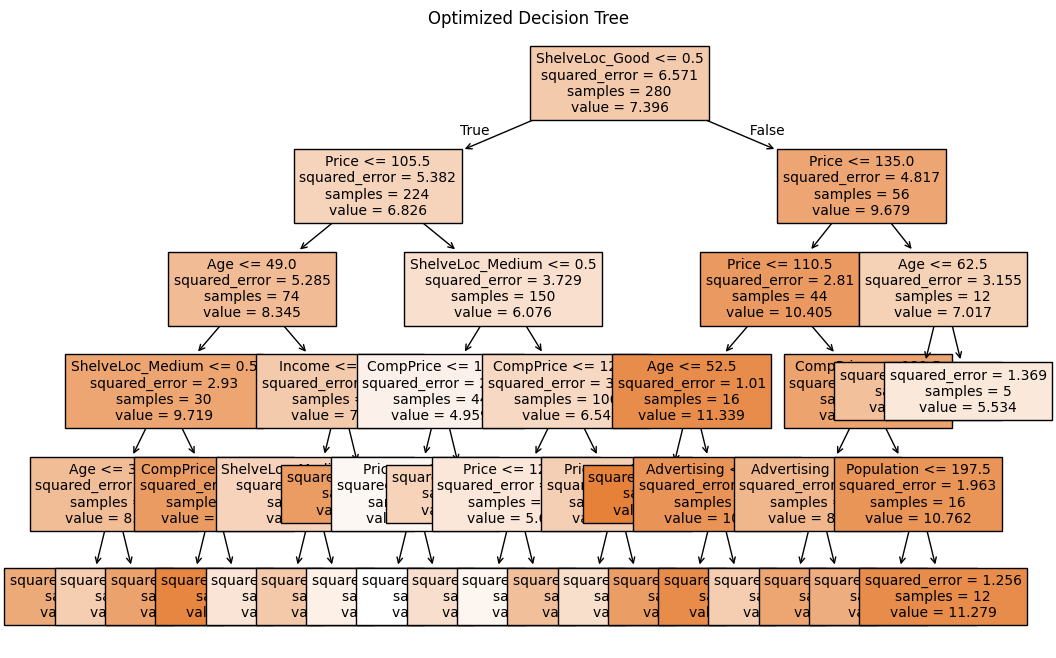

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(optimized_model_dt, feature_names=X_train.columns, filled=True, fontsize=10)
plt.title("Optimized Decision Tree")
plt.show()


In [32]:
feature_importances = optimized_model_dt.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


             Feature  Importance
4              Price    0.355405
7     ShelveLoc_Good    0.272895
8   ShelveLoc_Medium    0.098409
0          CompPrice    0.097908
5                Age    0.097339
1             Income    0.053185
2        Advertising    0.015250
3         Population    0.009610
6          Education    0.000000
9          Urban_Yes    0.000000
10            US_Yes    0.000000
